# THE Best Neighborhood in Pittsburgh
## All data was updated as of 11/11/2019

In [85]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
#importation of all csv files into pandas DataFrames
arrests = pd.read_csv("Crime.csv")
playgrounds = pd.read_csv("Playgrounds.csv")
school_enrollment = pd.read_csv("SchoolEnrollment.csv", index_col="Id")

In [87]:
school_enrollment2 = school_enrollment[['Neighborhood', 'Estimate; Total:']]
school_enrollment2.groupby('Estimate; Total:')
#school_enrollment2 = school_enrollment2.to_frame()
school_enrollment2 = school_enrollment2.reset_index()

school_enrollment2.head(10)

,Id,Neighborhood,Estimate; Total:
0,1,Allegheny Center,1389.0
1,2,Allegheny West,343.0
2,3,Allentown,2520.0
3,4,Arlington,1823.0
4,5,Arlington Heights,213.0
5,6,Banksville,3787.0
6,7,Bedford Dwellings,1251.0
7,8,Beechview,7770.0
8,9,Beltzhoover,1609.0
9,10,Bloomfield,8498.0


In [95]:
top10_SE = school_enrollment2.nlargest(10,['Estimate; Total:'])
top10_SE

,Id,Neighborhood,Estimate; Total:
77,78,Squirrel Hill South,15510.0
68,69,Shadyside,13290.0
13,14,Brookline,12777.0
76,77,Squirrel Hill North,11072.0
15,16,Carrick,9825.0
56,57,North Oakland,9565.0
53,54,Mount Washington,8525.0
9,10,Bloomfield,8498.0
7,8,Beechview,7770.0
36,37,Greenfield,7402.0


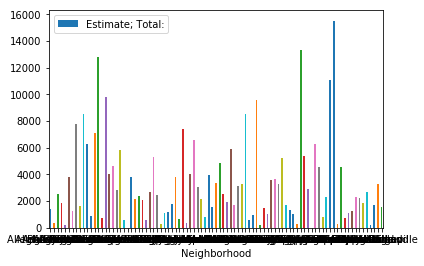

In [90]:
#Graph visual here
school_enrollment2.plot.bar(x='Neighborhood',y='Estimate; Total:', rot=0)

In [64]:
school_enrollment2.describe()

,Id,Estimate; Total:
count,91.00000,91.000000
mean,46.00000,3296.912088
std,26.41338,3145.352122
min,1.00000,3.000000
25%,23.50000,1124.000000
50%,46.00000,2291.000000
75%,68.50000,4312.000000
max,91.00000,15510.000000


**The neighborhood with the highest school enrollment:** Squirrel Hill South @ 15,510 Students

In [65]:
#Counting number of times each neighboorhood is mentioned in Crime.csv
#arrests_neighborhood = arrests.groupby('INCIDENTNEIGHBORHOOD').size().sort_values()

arrests_neighborhood = arrests.groupby('INCIDENTNEIGHBORHOOD').size()
arrests_neighborhood = arrests_neighborhood.to_frame()
arrests_neighborhood = arrests_neighborhood.reset_index()
arrests_neighborhood = arrests_neighborhood.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhood", 0:"Num_Crimes"})
arrests_neighborhood.head()

,Neighborhood,Num_Crimes
0,Allegheny Center,653
1,Allegheny West,75
2,Allentown,539
3,Arlington,168
4,Arlington Heights,100


In [69]:
top10_C = arrests_neighborhood.nlargest(10,['Num_Crimes'])
top10_C

,Neighborhood,Num_Crimes
16,Central Business District,2136
78,South Side Flats,1954
15,Carrick,1316
26,East Allegheny,1236
43,Homewood South,1141
42,Homewood North,1036
29,East Liberty,999
51,Marshall-Shadeland,855
55,Mount Washington,839
10,Bluff,786


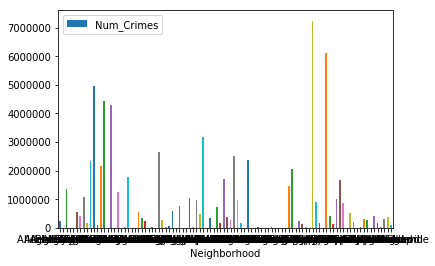

In [92]:
#Graph visual here
arrests_neighborhood.plot.bar(x='Neighborhood',y='Num_Crimes', rot=0)

In [43]:
arrests_neighborhood.describe()

,Num_Crimes
count,98.000000
mean,355.734694
std,385.483591
min,2.000000
25%,101.500000
50%,221.000000
75%,493.750000
max,2136.000000


**The neighborhood with the highest arrests recorded:** Central Business District @ 2,136 Crimes

In [70]:
#Finds the neighborhood with the most playgrounds
#playgrounds_num = playgrounds.groupby('neighborhood').size().sort_values(ascending = False)

playgrounds_num = playgrounds_num = playgrounds.groupby('neighborhood').size()
playgrounds_num = playgrounds_num.to_frame()
playgrounds_num = playgrounds_num.reset_index()
playgrounds_num = playgrounds_num.rename(columns = {"neighborhood": "Neighborhood", 0:"Num_Playgrounds"})
playgrounds_num.head()

,Neighborhood,Num_Playgrounds
0,Allegheny Center,4
1,Allentown,1
2,Banksville,1
3,Bedford Dwellings,1
4,Beechview,5


In [71]:
top10_P = playgrounds_num.nlargest(10,['Num_Playgrounds'])
top10_P

,Neighborhood,Num_Playgrounds
55,Squirrel Hill South,8
4,Beechview,5
51,South Side Slopes,5
0,Allegheny Center,4
28,Highland Park,4
48,Sheraden,4
5,Beltzhoover,3
11,Carrick,3
16,Crawford-Roberts,3
20,Elliott,3


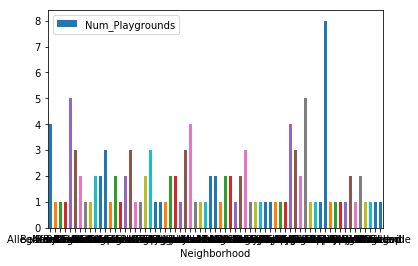

In [94]:
#Graph visual here
playgrounds_num.plot.bar(x='Neighborhood',y='Num_Playgrounds', rot=0)

In [79]:
playgrounds_num.describe()

,Num_Playgrounds
count,67.00000
mean,1.80597
std,1.28203
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,8.00000


**The neighborhood with the highest amount of playgrounds:** Squirrel Hill South @ 8 Playgrounds

In [80]:
#Playground to crime ratio
#Not all neighborhoods have playgrounds, so only the neighborhoods with playgrounds will be used.
ratio = 0
ratioDataframe =arrests_neighborhood

for i in range(0, len(arrests_neighborhood)):
    for j in range(0, len(playgrounds_num)):
        if playgrounds_num.loc[j, 'Neighborhood'] == arrests_neighborhood.loc[i, 'Neighborhood']:
            ratio = float(playgrounds_num.loc[j, 'Num_Playgrounds'])/float(arrests_neighborhood.loc[i, 'Num_Crimes'])
            ratioDataframe.loc[i, "Num_Crimes"] = ratio
ratioDataframe = ratioDataframe.sort_values("Num_Crimes").head(len(playgrounds_num))
ratioDataframe.head()

,Neighborhood,Num_Crimes
42,Homewood North,0.000965
78,South Side Flats,0.001024
10,Bluff,0.001272
68,Perry South,0.001570
52,Middle Hill,0.001757


In [81]:
#school enrollment to crime ratio
ratio = 0
ratioDataframe =arrests_neighborhood

for i in range(0, len(arrests_neighborhood)):
    for j in range(0, len(school_enrollment2)):
        if school_enrollment2.loc[j, 'Neighborhood'] == arrests_neighborhood.loc[i, 'Neighborhood']:
            ratio = float(school_enrollment2.loc[j, 'Estimate; Total:'])/float(arrests_neighborhood.loc[i, 'Num_Crimes'])
            ratioDataframe.loc[i, "Num_Crimes"] = ratio
ratioDataframe = ratioDataframe.sort_values("Num_Crimes").head(len(school_enrollment2))
ratioDataframe.head()

,Neighborhood,Num_Crimes
22,Chateau,0.011407
77,South Shore,0.075949
60,North Shore,0.435244
26,East Allegheny,1.694984
16,Central Business District,1.889981
